In [26]:
# Demo Klasifikasi Imagenet dengan model CNN NASNetMobile dari library Keras

In [27]:
# mengecek versi tensorflow yang dipakai
import tensorflow as tf 
print("Tensorflow version: "+tf.__version__) # cek versi Tensorflow

Tensorflow version: 2.1.0


In [28]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions
import numpy as np

In [29]:
# siapkan model NASnet Mobile, dengan bobot (weight) yang sudah jadi. Model tersebut sudah dilatih (trained) dengan dataset ImageNet
# deskripsi NASNet mobile: https://keras.io/applications/#nasnet
# keras.applications.nasnet.NASNetMobile(input_shape=None
#, include_top=True # menggunakan bobot ImageNet termasuk layer terakhir (fully connected layer)
#, weights='imagenet' # menggunakan bobot (weight) ImageNet
#, input_tensor=None
#, pooling=None
#, classes=1000) # jumlah output adalah 1000 class, sesuai dengan dataset ImageNet
model = NASNetMobile(weights='imagenet')

In [30]:
# sebagai perbandingan, load model NASNetMobile tanpa top layer.
model_notop=NASNetMobile(include_top=False, weights='imagenet')

In [31]:
# untuk melakukan klasifikasi, contoh file diambil dari situs berikut ini:
# https://commons.wikimedia.org/wiki/File:Elephant.jpg
# https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
# https://en.wikipedia.org/wiki/NeXT_Computer#/media/File:NEXT_Cube-IMG_7154.jpg -> 2880px-NEXT_Cube-IMG_7154.jpg

In [32]:
img_path = 'Zoorashia_elephant.jpg'
img_asli=image.load_img(img_path)# load image
img = image.load_img(img_path, target_size=(224, 224)) #resize image, karena model perlu input 224x224x3 (RGB)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)



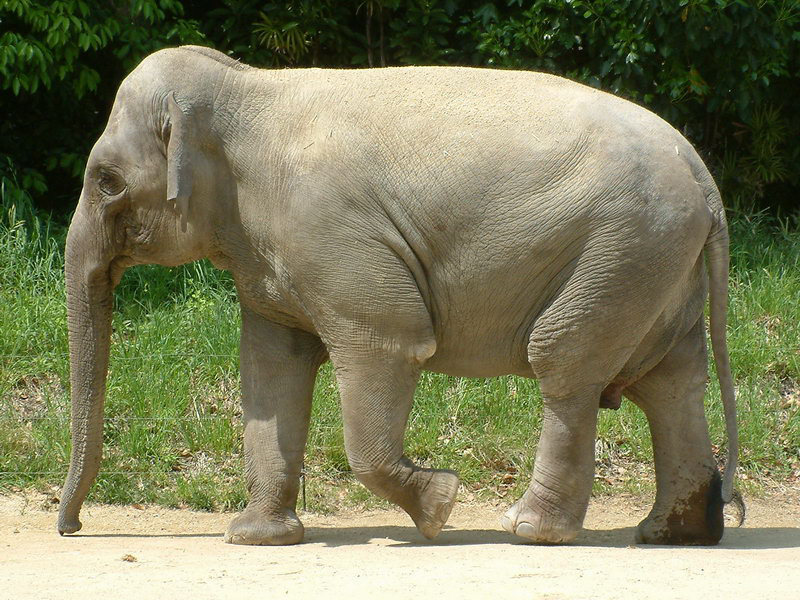

In [33]:
img_asli #gambar asli, belum diresize ke 224x224

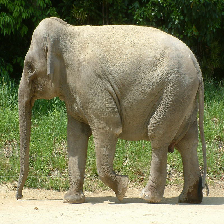

In [34]:
img #gambar setelah diresize ke 224x224, perhatikan ada perubahan aspect ratio.

In [35]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504013', 'Indian_elephant', 0.7924855), ('n02504458', 'African_elephant', 0.06642715), ('n01871265', 'tusker', 0.06621385)]


In [36]:
# Hasil prediksi (preds) adalah vektor dengan 1000 angka. 
# Untuk mencari jenis dari image, dicari angka tertinggi dari vektor tersebut, dengan fungsi decode_predictions
# Model NASNetmobile menyatakan bahwa gambar tersebut adalah "Indian_elephant"

In [37]:
preds.shape # dapat dicek bahwa output berupa array dengan dimensi 1x1000

(1, 1000)

In [38]:
# preds adalah output dari model. layer terakhir dari model menggunakan softmax. 
# Dapat dicek bahwa jumlah semua elemen vektor preds adalah 1 (atau mendekati)
np.sum(preds)

1.0

In [39]:
img_path = 'Elephant.jpg'
img_asli=image.load_img(img_path)
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01871265', 'tusker', 0.48852003), ('n02504458', 'African_elephant', 0.3776272), ('n02504013', 'Indian_elephant', 0.035093427)]


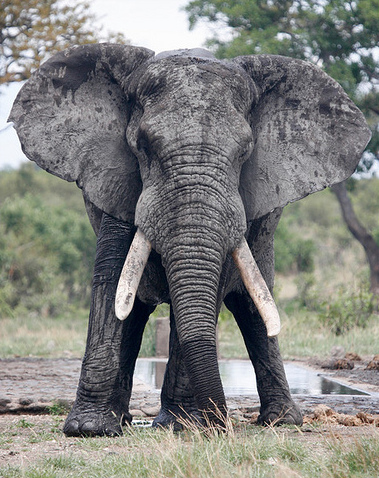

In [40]:
img_asli

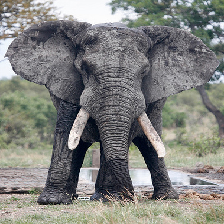

In [41]:
img

In [42]:
img_path = '2880px-NEXT_Cube-IMG_7154.jpg'
img_asli=image.load_img(img_path)
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n03180011', 'desktop_computer', 0.8695141), ('n04152593', 'screen', 0.0154024465), ('n03691459', 'loudspeaker', 0.01404328), ('n03782006', 'monitor', 0.009769569), ('n03085013', 'computer_keyboard', 0.005464859)]


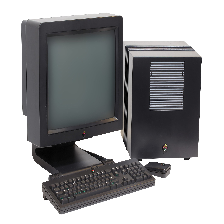

In [43]:
img

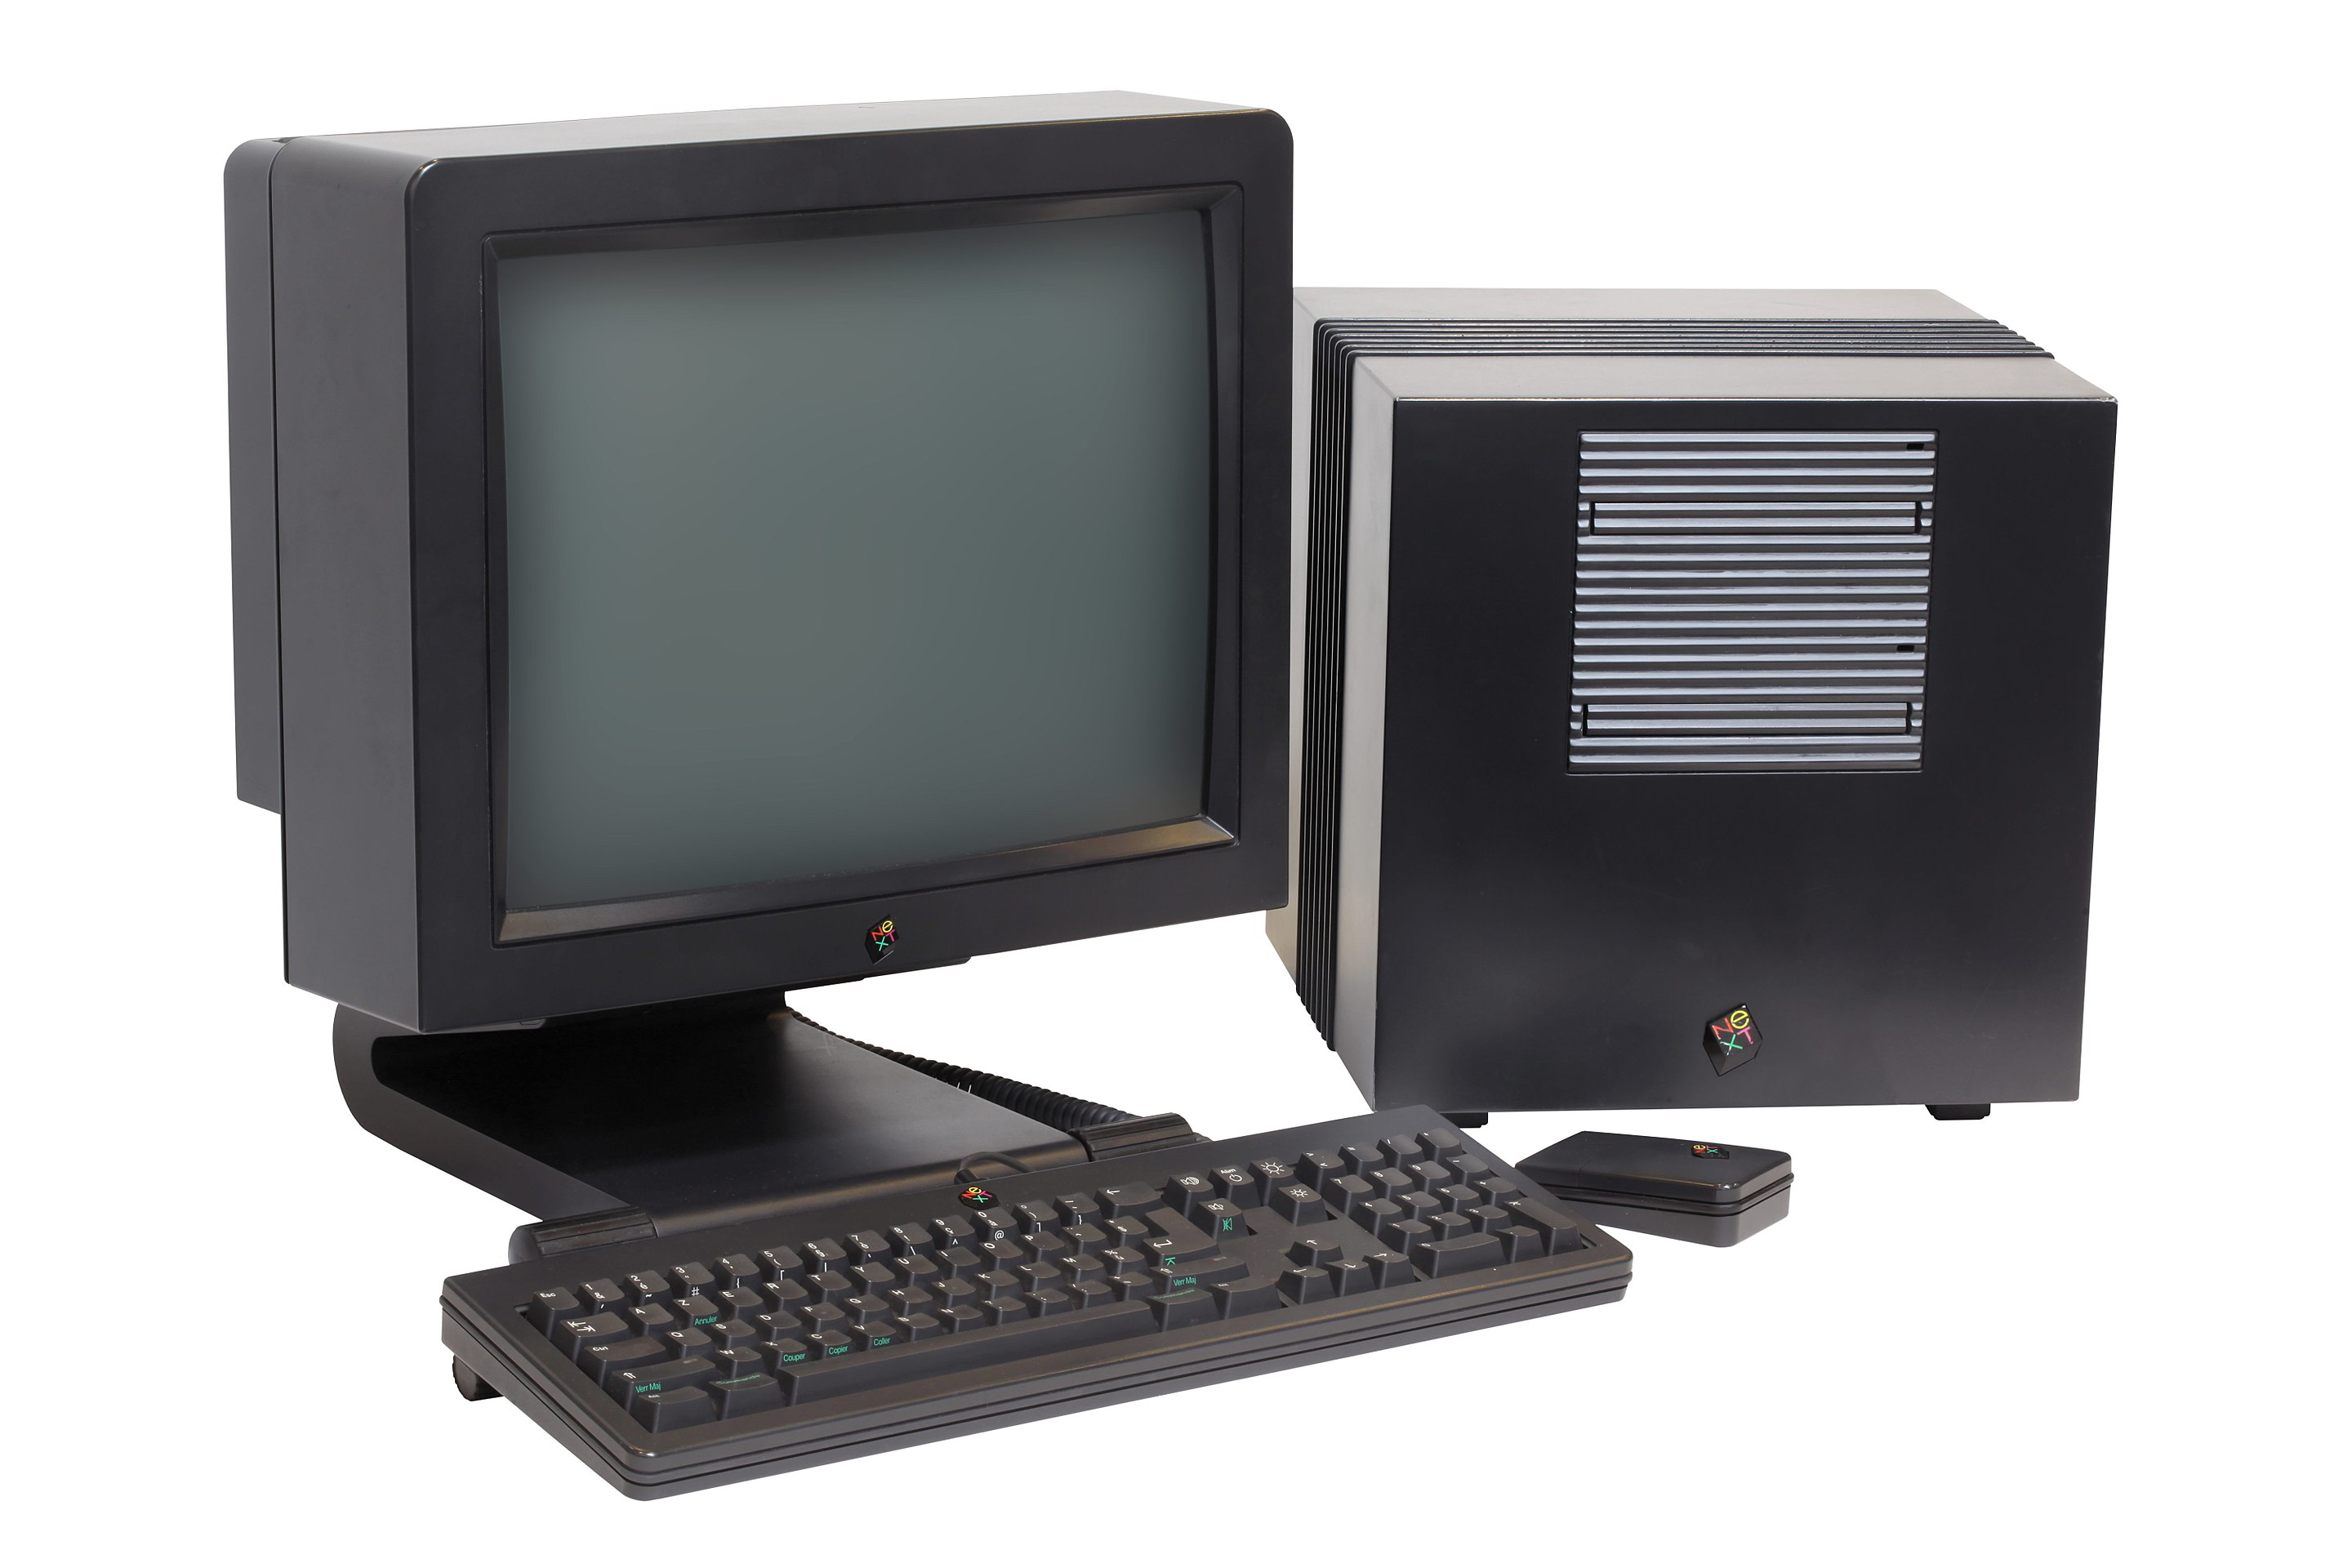

In [44]:
img_asli

In [ ]:
parsed_json = (json.loads(json_data))

In [ ]:
# daftar class ImageNet ada di file <home-directory>/.keras/models/imagenet_class_index.json

In [45]:
filename="C:/Users/waskita/.keras/models/imagenet_class_index.json"

In [46]:
import json
with open(filename, 'r') as f:
    distros_dict = json.load(f)

In [48]:
distros_dict #menampilkan daftar class pada ImageNet, ada 1000 jenis hasil klasifikasi

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [6]:
preds.shape

(1, 1000)

In [53]:
model.summary() #summary() untuk menampilkan susunan layer pada neural network NASNetMobile 

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_752 (Activation)     (None, 111, 111, 32) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

Total params: 5,326,716
Trainable params: 5,289,978
Non-trainable params: 36,738
__________________________________________________________________________________________________


In [54]:
model_notop.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_940 (Activation)     (None, 111, 111, 32) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [ ]:
# pada 2 model di atas, nampak perbedaan pada 2 layer terakhir saja. 